## Walmart Sales analysis 

#### Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#### Load and inspect Data

In [2]:
df=pd.read_csv("C:\\Users\\RISHITA MITRA\\Downloads\\Walmart_Sales.csv")


In [3]:
df.shape

(6435, 8)

In [4]:
df.head

<bound method NDFrame.head of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

         

In [5]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### Check for Missing Values and duplicates

In [7]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

### convert Date to Datetime Format  

In [9]:
df['Date']=pd.to_datetime(df['Date'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          2565 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


## Descriptive Satistics

In [11]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,2565,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-05-29 11:47:22.105263104,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-01-10 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-09 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-05-08 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-03 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-12-10 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


#### Which store has the higest Total?

In [12]:
Store_sales =df.groupby('Store')['Weekly_Sales'].sum().sort_values( ascending=False)

#### Trends of Weekly sales over time

In [13]:
Weekly_Trend=df.groupby('Date')['Weekly_Sales'].sum()

#### Holidays vs Non Holidays Sales

In [14]:
Holidays_Sales =df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

#### Correlation Of Weekly Sales with numeric Variables

In [15]:
Correlation= df.corr(numeric_only=True)

#### Store Consistency(Standard deviation of weekly sales)

In [16]:
Store_Variability= df.groupby('Store')['Weekly_Sales'].std().sort_values()

## Visualizations 

#### 1. Total sales by store

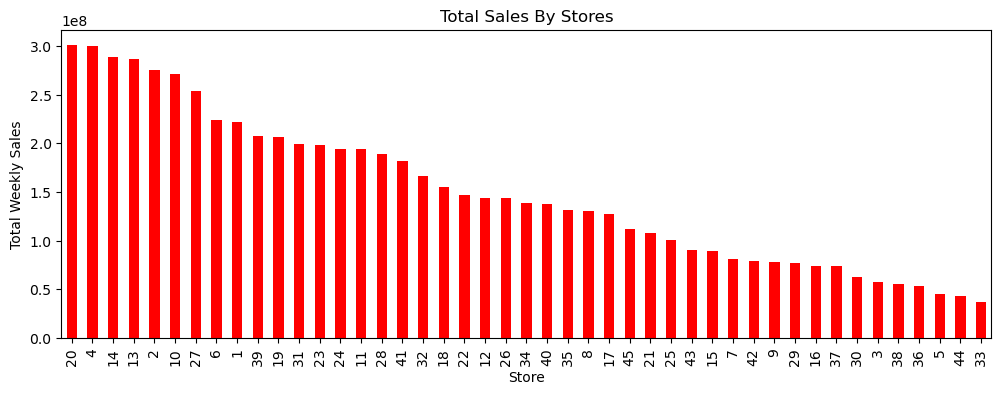

In [20]:
plt.figure(figsize=(12,4))
Store_sales.plot(kind='bar',color='r')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.title('Total Sales By Stores')
plt.savefig('Total Sales By Stores.png')

#### 2.Weekly Sales Trends over Time

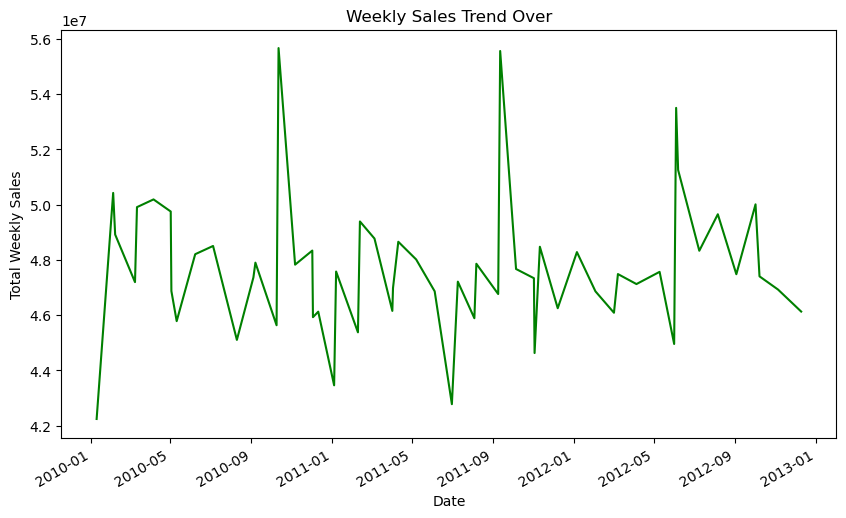

In [22]:
plt.figure(figsize=(10,6))
Weekly_Trend.plot(color='green')
plt.title('Weekly Sales Trend Over')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.savefig('Weekly Sales Trend Over.png')

#### 3. Holiday Vs Non-Holiday Sales

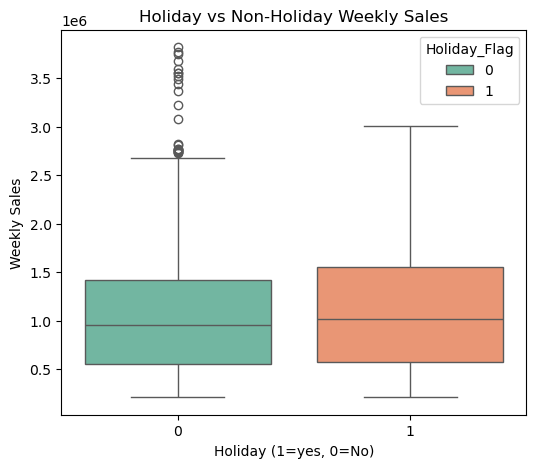

In [23]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Holiday_Flag',y='Weekly_Sales',data=df, palette='Set2', hue='Holiday_Flag')
plt.title('Holiday vs Non-Holiday Weekly Sales')
plt.xlabel('Holiday (1=yes, 0=No)')
plt.ylabel('Weekly Sales')
plt.savefig('Holiday vs Non-Holiday Weekly Sales.png')

#### Using IQR method

In [20]:
Q1= df['Weekly_Sales'].quantile(0.25) 
Q3= df['Weekly_Sales'].quantile(0.75)
IQR= Q3-Q1
Lower_limit=Q1-1.5*IQR
upper_Limit=Q3+1.5*IQR

In [21]:
outliers= df[(df['Weekly_Sales']<Lower_limit)|(df['Weekly_Sales']>upper_Limit)]

#### 4. Correlation Heatmap

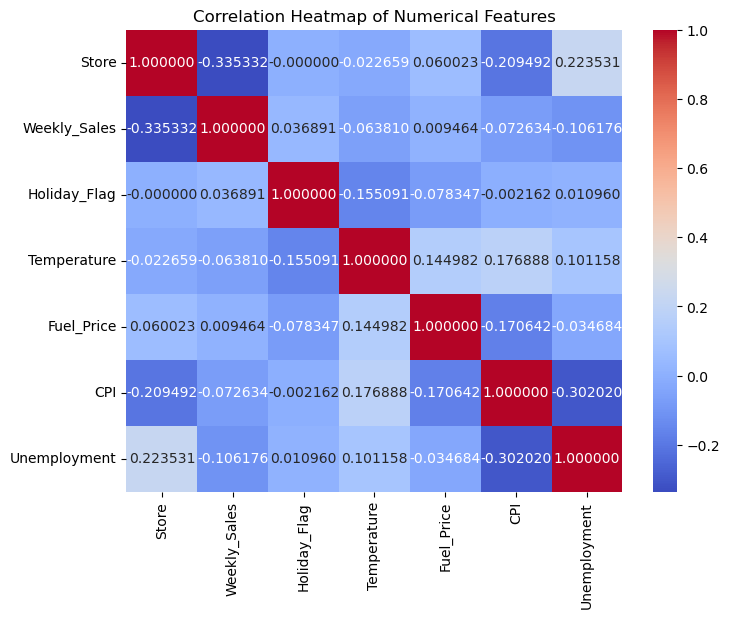

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(Correlation, annot=True,cmap='coolwarm', fmt='2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig('Correlation Heatmap of Numerical Features')